# Me he dado cuenta de que este trabajo casi entero seguramente esté mal, porque a la hora de separar los datos en entrenamiento y test, me cargué sin querer la variable caa, que tiene mucha importancia, así que cuando leas esto y puedas vuelve a ejecutar todo y ajusta lo necesario


# Preprocesado de los datos



## Introducción al dataset

El Dataset ha sido extraído de kaggle, tenemos datos médicos sobre personas que han sufrido o no un infarto.</br>
Contamos con la siguientes columnas:</br></br>

Age : Edad del paciente

Sex : Sexo del paciente

trtbps : Presión arterial en descanso (en mmHg)

chol : Colesterol en mg/dl medido por un sensor de IMC

thalachh : Ritmo cardiaco máximo conseguido durante prueba de estrés

oldpeak: Depresión de onda ST inducida por ejercicio en descanso

caa: Número de vasos principales del corazón coloreados por fluoroscopia (0-4)

exang: Aparece angina inducida por el ejercicio
*  Valor 0: No
*  Valor 1: Si

cp : Tipo de dolor en el pecho
*  Valor 0: angina típica
*  Valor 1: angina atípica
*  Valor 2: dolor no anginal
*  Valor 3: asintomático

fbs : Nivel de azucar en sangre en ayuno
*  Valor 0: < 120 mg/dl
*  Valor 1: > 120 mg/dl

thall : Resultado de prueba de esfuerzo con Talio
* Valor 1: Defecto arreglado
* Valor 2: Normal
* Valor 3: Defecto reversible

rest_ecg : Resultado de electrocardiograma en reposo
*   Valor 0: normal
*   Valor 1: muestra anormalidades en el patron de onda ST-T (inversiones de onda T y/o elevación o depresión ST de > 0.05 mV)
* Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva, por el criterio de Estes

slp :  Pendiente mostrada por la onda ST durante electrocardiograma en prueba de esfuerzo
* Valor 0: Auge
* Valor 1: Plana
* Valor 2: Declive

target :
*   0 = menor posibilidad de infarto
*   1 = mayor posibilidad de infarto


## Importamos el dataset





In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
heart=pd.read_csv('heart.csv')
heart.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Manejo de datos missing

In [ ]:
heart.isnull().sum()

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [ ]:
len(heart)

10000

Como podemos observar, de forma natural no hay valores missings en nuestro dataset.

## Manejar datos categóricos

En el caso de mi dataset, las variables categóricas ya vienen codificadas en valores numéricos, sin embargo, voy a volver a codificarlas como categóricas, para demostrar cuál sería el proceso a seguir.

El primer paso a seguir es identificar las variables categóricas, las cuales son:


*   Sex
*   cp
* rest_ecg
* thall

Vamos a aprovechar, que con las variables cp y rest_ecg, es correcto utilizar la codificación one-hot, para demostrar cuál sería el proceso a seguir, en caso de tener que codificar variables categóricas como numéricas:



In [ ]:
heart_categoricas = heart.copy()

heart_categoricas['cp'].replace([0, 1, 2, 3],
                        ['típica', 'atípica', 'no_anginal', 'asintomático'], inplace=True)
heart_categoricas['restecg'].replace([0, 1, 2],
                        ['normal', 'anormalidades_patron_onda_ST-T', 'hipertrofia_ventricular_izquierda'], inplace=True)
heart_categoricas['slp'].replace([0, 1, 2],
                        ['auge', 'plana', 'declive'], inplace=True)
heart_categoricas['thall'].replace([1, 2, 3],
                        ['defecto_arreglado', 'normal', 'defecto_reversible'], inplace=True)
heart_categoricas.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asintomático,145,233,1,normal,150,0,2.3,auge,0,defecto_arreglado,1
1,37,1,no_anginal,130,250,0,anormalidades_patron_onda_ST-T,187,0,3.5,auge,0,normal,1
2,41,0,atípica,130,204,0,normal,172,0,1.4,declive,0,normal,1
3,56,1,atípica,120,236,0,anormalidades_patron_onda_ST-T,178,0,0.8,declive,0,normal,1
4,57,0,típica,120,354,0,anormalidades_patron_onda_ST-T,163,1,0.6,declive,0,normal,1


A continuación, conseguimos los dummies de las variables

In [ ]:
dummy_cp = pd.get_dummies(heart_categoricas["cp"], prefix="cp")
dummy_restecg = pd.get_dummies(heart_categoricas["restecg"], prefix="restecg")
dummy_slp = pd.get_dummies(heart_categoricas["slp"], prefix="slp_pendiente")
dummy_thall = pd.get_dummies(heart_categoricas["thall"], prefix="thall")

Este es el ejemplo de como quedaría una de nuestras variables, con codifcación one hot

In [ ]:
dummy_cp.head(10)

,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


Una vez hecho eso, eliminamos de nuestro dataframe original las columnas correspondientes a esas variables, las reemplazamos por el dataframe que hemos creado con la codifiación one-hot ya realizada

In [ ]:
heart_categoricas = heart_categoricas.drop(['cp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_cp], axis = 1)
heart_categoricas = heart_categoricas.drop(['restecg'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_restecg], axis = 1)
heart_categoricas = heart_categoricas.drop(['slp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_slp], axis = 1)
heart_categoricas = heart_categoricas.drop(['thall'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_thall], axis = 1)

In [ ]:
heart_categoricas.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_anormalidades_patron_onda_ST-T,restecg_hipertrofia_ventricular_izquierda,restecg_normal,slp_pendiente_auge,slp_pendiente_declive,slp_pendiente_plana,thall_0,thall_defecto_arreglado,thall_defecto_reversible,thall_normal
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,0,0,0,1
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,1,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,1,0,0,0,1,0,0,0,0,1


## Estandarizacion y normalizacion de los datos

### Estandarización

Para empezar, vamos a mostrar todas nuestras variables de forma gráfica, y así estudiar su distribución

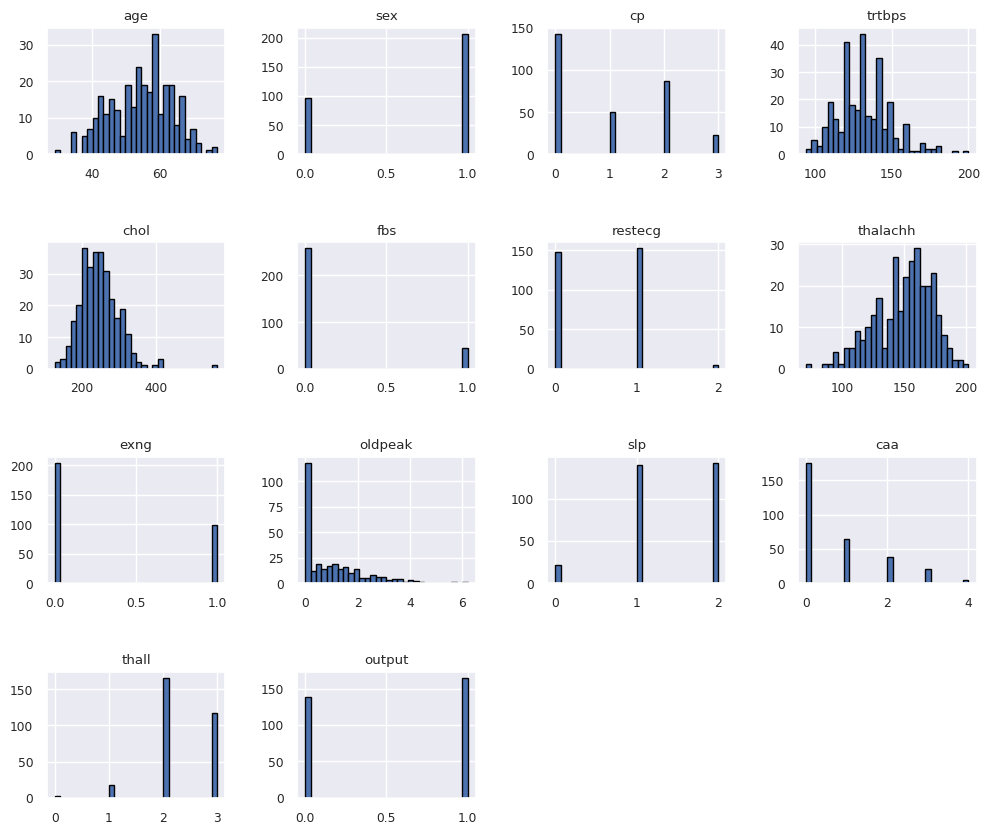

In [ ]:
heart.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Y vamos a mostrar la medida de skewness y kurtosis de todas nuestras variables

In [ ]:
cols = heart.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % heart[c].skew())
    print("Kurtosis: %f" % heart[c].kurt())

------age------
Skewness: -0.202463
Kurtosis: -0.542167
------sex------
Skewness: -0.791335
Kurtosis: -1.382961
------cp------
Skewness: 0.484732
Kurtosis: -1.193071
------trtbps------
Skewness: 0.713768
Kurtosis: 0.929054
------chol------
Skewness: 1.143401
Kurtosis: 4.505423
------fbs------
Skewness: 1.986652
Kurtosis: 1.959678
------restecg------
Skewness: 0.162522
Kurtosis: -1.362673
------thalachh------
Skewness: -0.537410
Kurtosis: -0.061970
------exng------
Skewness: 0.742532
Kurtosis: -1.458317
------oldpeak------
Skewness: 1.269720
Kurtosis: 1.575813
------slp------
Skewness: -0.508316
Kurtosis: -0.627521
------caa------
Skewness: 1.310422
Kurtosis: 0.839253
------thall------
Skewness: -0.476722
Kurtosis: 0.297915
------output------
Skewness: -0.179821
Kurtosis: -1.980783


In [ ]:
corr = heart_categoricas.corr()
target_corr = corr['output'].drop('output')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

A continuación vamos a intentar estandarizar algunas de las variables continuas que tenemos en nuestro dataset

<ipython-input-14-8aebaf190c55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['trtbps'], hist = True, kde = True)


0.7137684379181465
0.9290540528369715


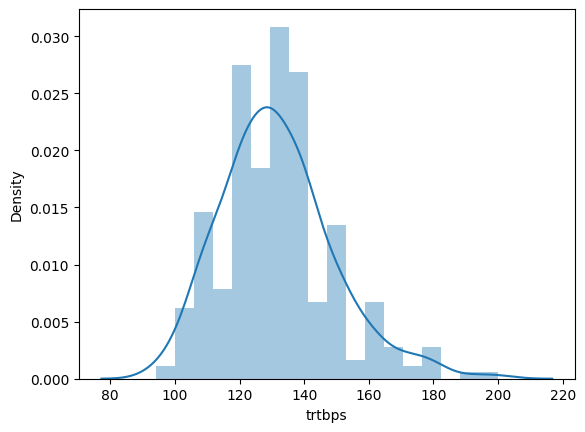

In [ ]:
sns.distplot(heart_categoricas['trtbps'], hist = True, kde = True)
print(heart_categoricas['trtbps'].skew())
print(heart_categoricas['trtbps'].kurt())

<ipython-input-15-ad7e2cdd8090>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['trtbps_log'], hist = True, kde = True)


0.2817574464672539
0.22010114981330986


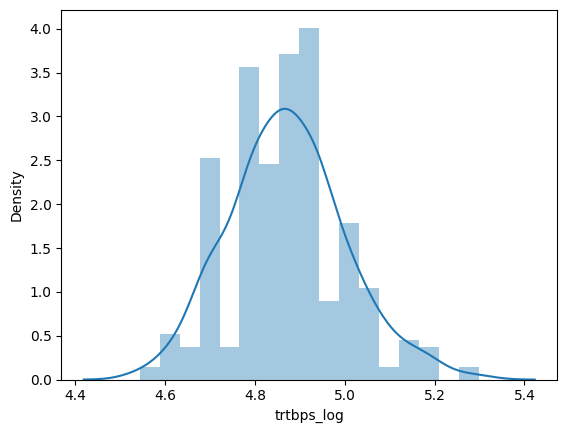

In [ ]:
heart_categoricas['trtbps_log'] = np.log(heart_categoricas['trtbps'])
sns.distplot(heart_categoricas['trtbps_log'], hist = True, kde = True)
print(heart_categoricas['trtbps_log'].skew())
print(heart_categoricas['trtbps_log'].kurt())

<ipython-input-16-47f24f51d481>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['thalachh'], hist = True, kde = True)


-0.5374096526832253
-0.06196993057611566


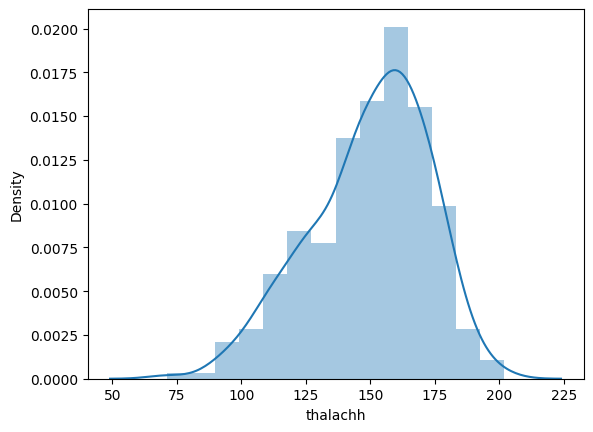

In [ ]:
sns.distplot(heart_categoricas['thalachh'], hist = True, kde = True)
print(heart_categoricas['thalachh'].skew())
print(heart_categoricas['thalachh'].kurt())

<ipython-input-17-40e194ce9499>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['thalachh_log'], hist = True, kde = True)


-0.9994164387055479
1.1615897208819228


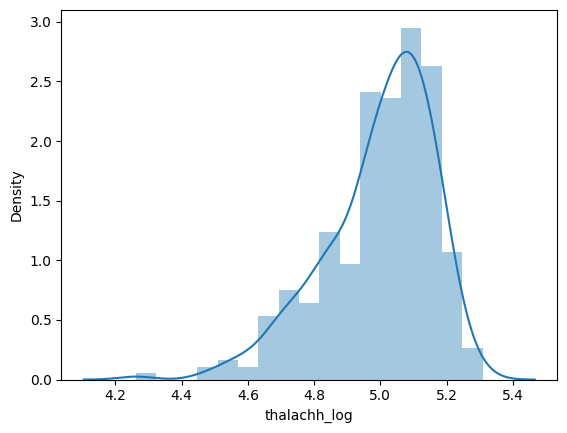

In [ ]:
heart_categoricas['thalachh_log'] = np.log(heart_categoricas['thalachh'])
sns.distplot(heart_categoricas['thalachh_log'], hist = True, kde = True)
print(heart_categoricas['thalachh_log'].skew())
print(heart_categoricas['thalachh_log'].kurt())

<ipython-input-18-66b880159f9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['chol'], hist = True, kde = True)


1.1434008206693387
4.505423167753712


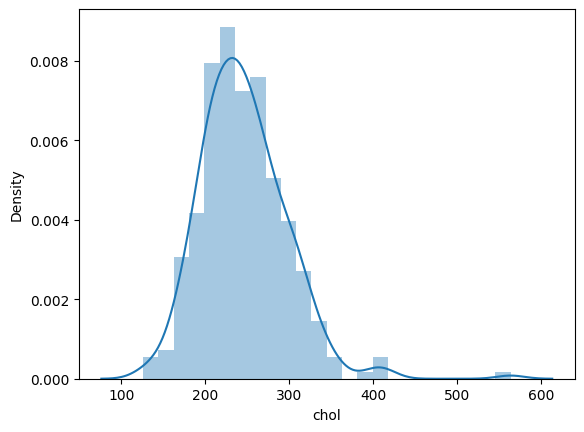

In [ ]:
sns.distplot(heart_categoricas['chol'], hist = True, kde = True)
print(heart_categoricas['chol'].skew())
print(heart_categoricas['chol'].kurt())

<ipython-input-19-b9db73781754>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['chol_log'], hist = True, kde = True)


0.08666713455435988
0.9251567574125086


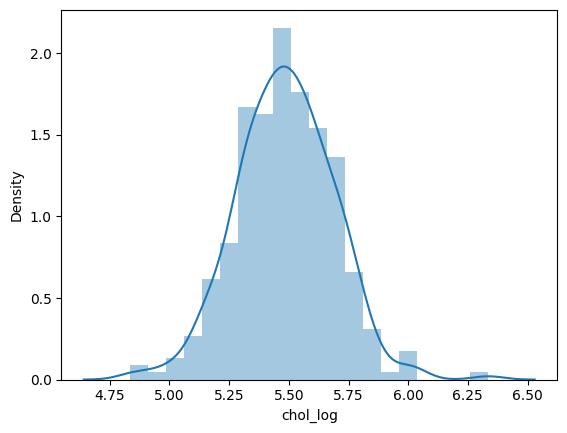

In [ ]:
heart_categoricas['chol_log'] = np.log(heart_categoricas['chol'])
sns.distplot(heart_categoricas['chol_log'], hist = True, kde = True)
print(heart_categoricas['chol_log'].skew())
print(heart_categoricas['chol_log'].kurt())

<ipython-input-34-8e8891cf4173>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['age'], hist = True, kde = True)


-0.2024633654856539
-0.5421671409908408


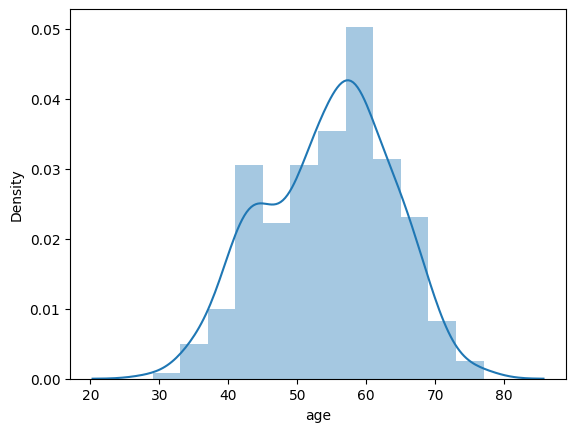

In [ ]:
sns.distplot(heart_categoricas['age'], hist = True, kde = True)
print(heart_categoricas['age'].skew())
print(heart_categoricas['age'].kurt())

<ipython-input-35-794ac56fc903>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_categoricas['age_log'], hist = True, kde = True)


-0.5841619021816962
-0.1142381345489647


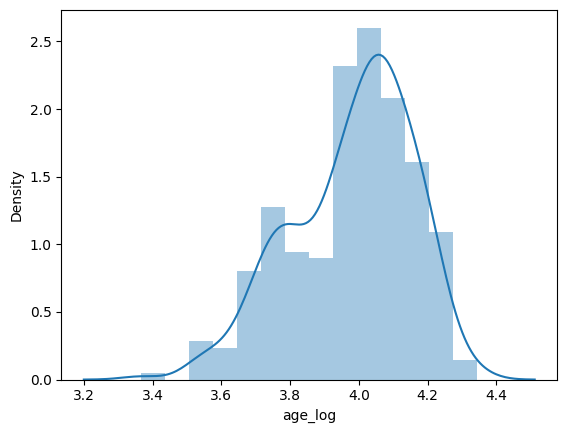

In [ ]:
heart_categoricas['age_log'] = np.log(heart_categoricas['age'])
sns.distplot(heart_categoricas['age_log'], hist = True, kde = True)
print(heart_categoricas['age_log'].skew())
print(heart_categoricas['age_log'].kurt())

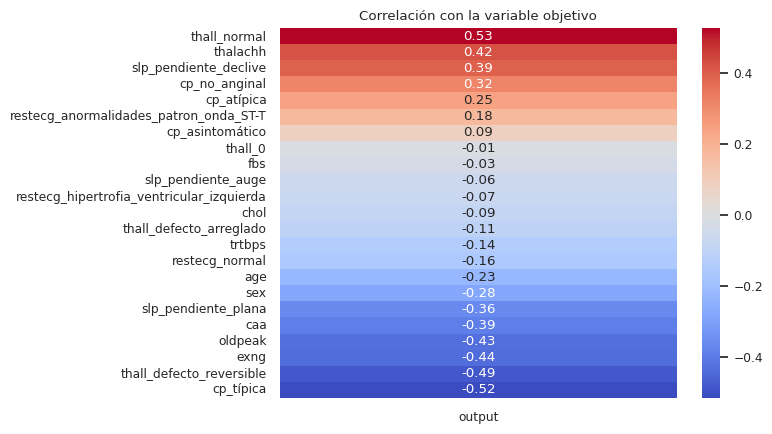

In [ ]:
corr = heart_categoricas.corr()
target_corr = corr['output'].drop('output')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

age mejora en skewness pero empeora en kurtosis, así que vamosa  descartar el cambio

trbtps mejora en skewness y kurtosis, la relacion con la variable objetivo se queda igual

thalachh empeora en skewness y kurtosis, y en relacion con variable objetivo tambien

chol mejora considerablemente en skewness y kurtosis, y su relacion con la variable objetivo se queda igual

Es por ello que solo vamos a realizar las transformaciones de chol y trtbps


Realizamos las transformaciones que mejoran la skewness y kurtosis de nuestros datos

In [ ]:
heart_categoricas['chol'] = np.log(heart_categoricas['chol'])
heart_categoricas['trtbps'] = np.log(heart_categoricas['trtbps'])

Y volvemos a representarlos

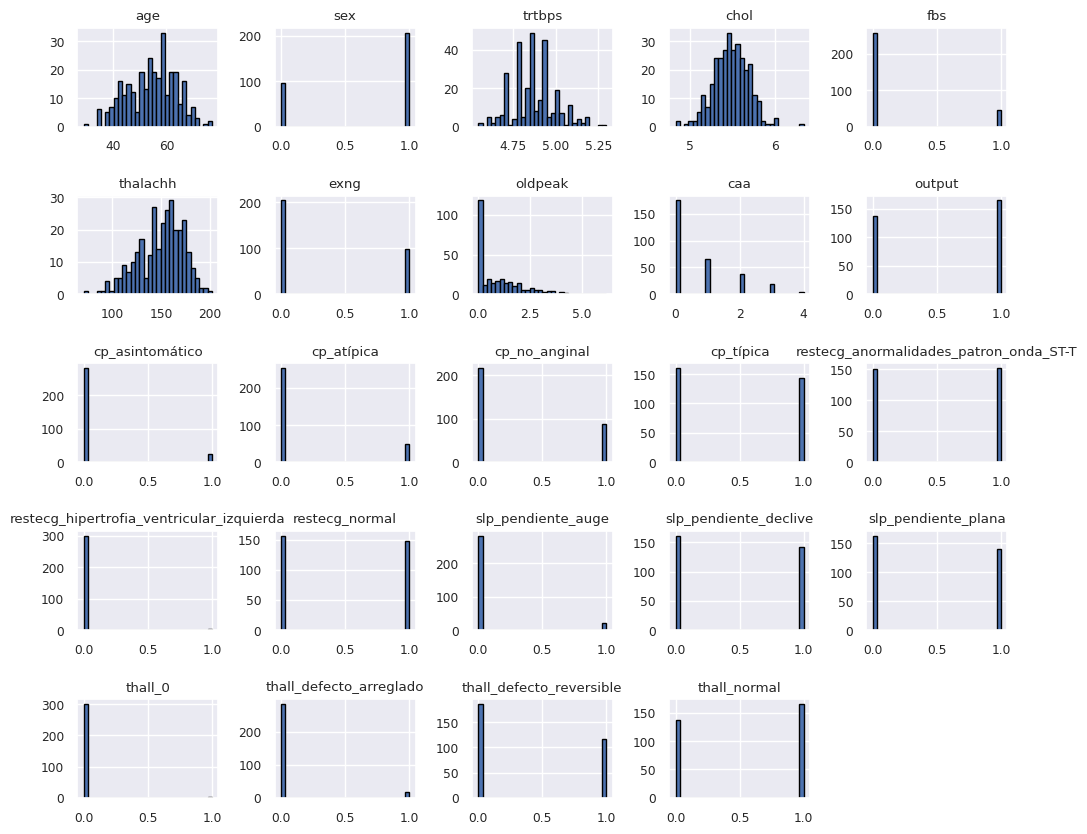

In [ ]:
heart_categoricas.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Normalización

La normalización de los datos la vamos a aplicar justo antes de pasarlos al algoritmo, para así poder controlar mejor qué datos están normalizados y cuales no, y poder desnormalizarlos de forma correcta a la hora de interpretar nuestras predicciones.

## Separar datos en conjuntos de entrenamiento y test

Separamos la x de la y

In [ ]:
heart_no_target = heart_categoricas.drop(columns=['output'])

X = heart_no_target.values

y = heart_categoricas['output']

In [ ]:
# explore dataset
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
#print(X)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# Divide los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state = 0)

[[63.00 0.00 4.91 ... 0.00 0.00 1.00]
 [70.00 1.00 4.87 ... 0.00 0.00 1.00]
 [43.00 1.00 5.01 ... 0.00 0.00 1.00]
 ...
 [56.00 1.00 4.79 ... 0.00 1.00 0.00]
 [47.00 1.00 4.93 ... 0.00 0.00 1.00]
 [58.00 1.00 4.79 ... 0.00 0.00 1.00]]
[[70.00 1.00 4.98 ... 0.00 1.00 0.00]
 [64.00 1.00 5.14 ... 0.00 1.00 0.00]
 [59.00 1.00 5.14 ... 0.00 1.00 0.00]
 ...
 [47.00 1.00 4.87 ... 0.00 0.00 1.00]
 [59.00 1.00 5.10 ... 1.00 0.00 0.00]
 [62.00 0.00 4.93 ... 0.00 0.00 1.00]]
[1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1

## Normalización de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)
X_val_scaled = scaler_simple.transform(X_val)
print(X_train_scaled)
print(X_test_scaled)
print(X_val_scaled)

[[0.49 0.74 0.62 ... -0.27 -0.78 0.90]
 [1.20 0.74 0.50 ... -0.27 -0.78 0.90]
 [-1.05 -1.36 0.50 ... -0.27 -0.78 0.90]
 ...
 [0.02 0.74 0.14 ... -0.27 1.28 -1.11]
 [0.02 -1.36 0.14 ... -0.27 -0.78 0.90]
 [0.61 -1.36 1.18 ... -0.27 -0.78 0.90]]
[[1.79 0.74 0.90 ... -0.27 1.28 -1.11]
 [1.08 0.74 2.19 ... -0.27 1.28 -1.11]
 [0.49 0.74 2.19 ... -0.27 1.28 -1.11]
 ...
 [-0.93 0.74 0.01 ... -0.27 -0.78 0.90]
 [0.49 0.74 1.90 ... 3.73 -0.78 -1.11]
 [0.84 -1.36 0.50 ... -0.27 -0.78 0.90]]
[[0.25 0.74 -0.11 ... -0.27 1.28 -1.11]
 [0.37 0.74 -2.12 ... -0.27 1.28 -1.11]
 [-0.22 -1.36 -0.11 ... -0.27 -0.78 -1.11]
 ...
 [-0.10 -1.36 0.14 ... -0.27 -0.78 0.90]
 [1.67 -1.36 0.62 ... -0.27 -0.78 0.90]
 [1.91 -1.36 -1.20 ... -0.27 -0.78 0.90]]


# EDA básico

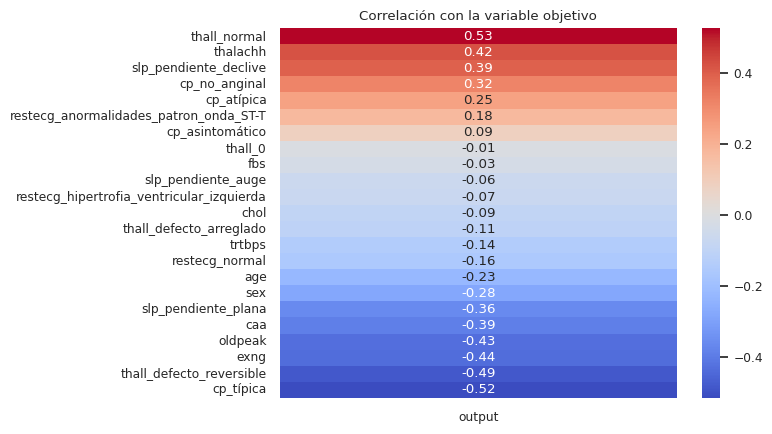

In [ ]:
corr = heart_categoricas.corr()
target_corr = corr['output'].drop('output')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

<Axes: >

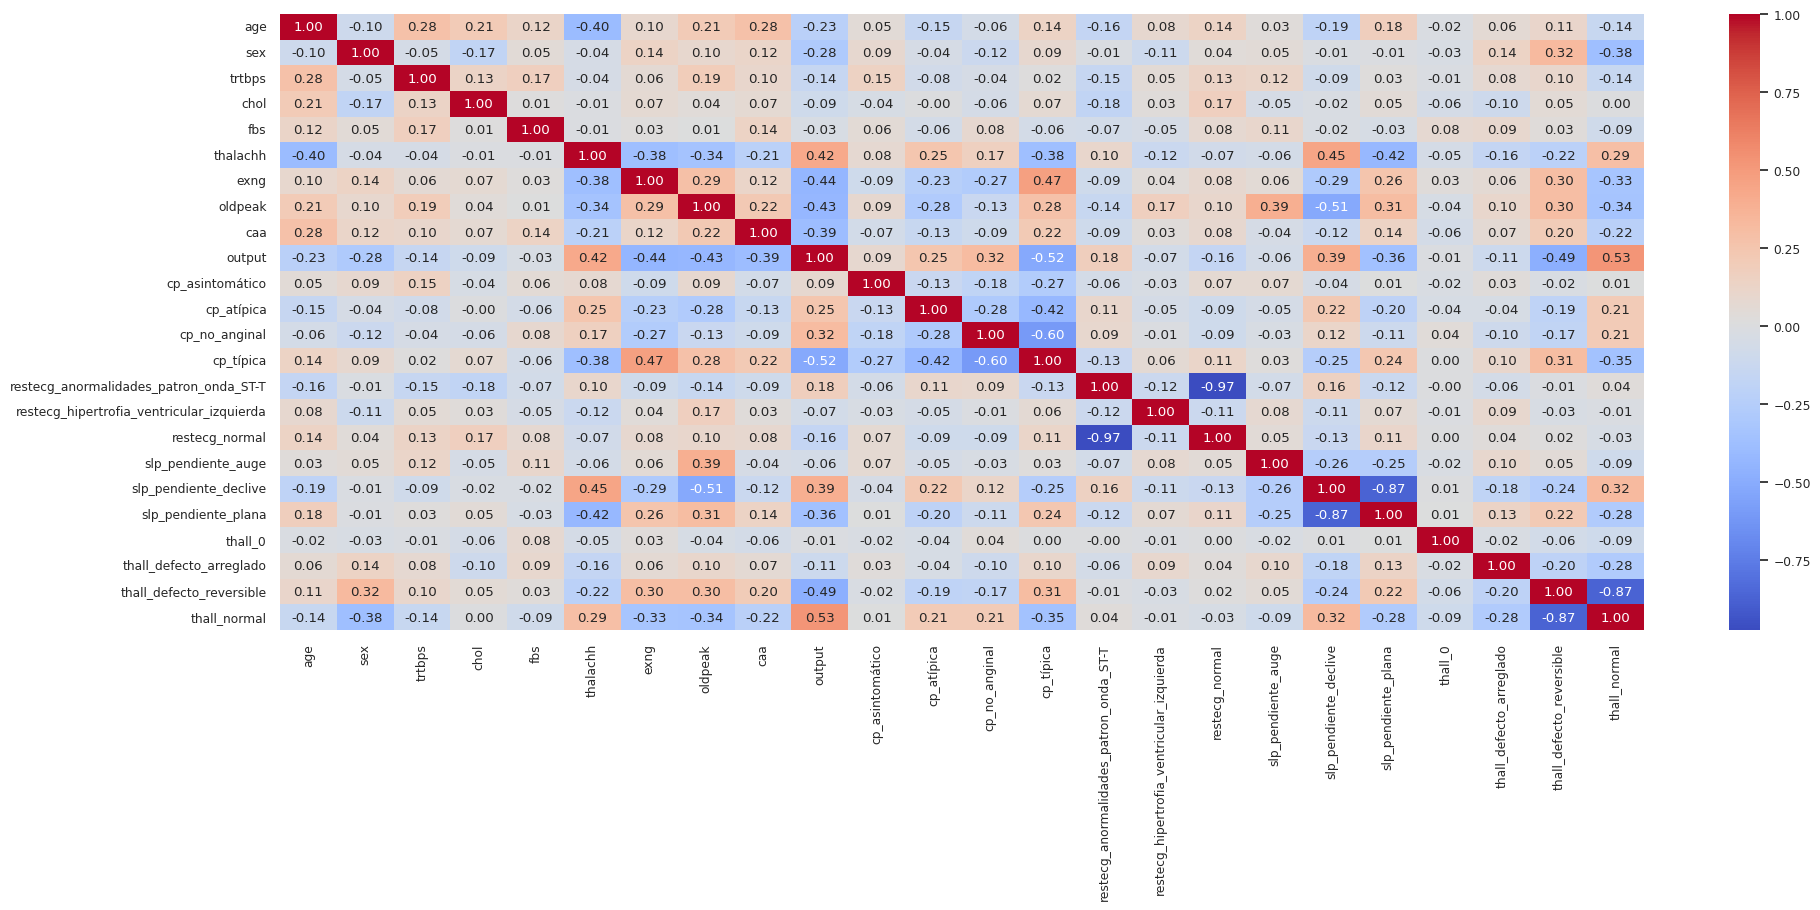

In [ ]:
fig, ax = plt.subplots(figsize = (22, 8))

sns.heatmap(heart_categoricas.corr(), annot=True, fmt = '.2f', cmap="coolwarm")

## Conclusiones:

Podemos ver que la correlación entre las variables restecg_normal y restecg_anormalidades_patron_onda_ST-T es de -0.97, por lo que podríamos prescindar de una de las dos. En estos casos es mejor prescindir de la variable que menos correlación tenga con la objetivo, en el caso de restecg_normal la correlacion es de -0.16, y la de restecg_anormalidades_patron_onda_ST-T de 0.18, así que vamos a prescindir de la variable restecg_normal.

Observamos algo parecido con thall_normal y thall_defecto_reversible, cuya correlación es de -0.87, thall_normal tiene una correlacion con la variable objetivo de 0.53, y thall_defecto_reversible tiene una correlación de -0.49.
Como en este caso ambas variables tienen una correlación bastante elevada con la objetivo, vamos a conservar las dos.

Pasa lo mismo con slp_pendiente_declive y slp_pendiente_plana, cuya correlación es de -0.87, slp_pendiente_declive tiene una correlacion con la variable objetivo de 0.39, y slp_pendiente_plana tiene una correlación de -0.36.
Como ambas variables tienen una correlación elevada con la objetivo, vamos a conservar las dos.


En cuanto a correlación directa con la variable objetivo, podemos ver que fbs y slp_pendiente_auge, tienen una correlación con la variable objetivo muy baja, asi que también podríamos prescindir de ellas, ya que no serán muy útiles para nuestro modelo.

Las variables con más correlación positiva con la objetivo son:
thall_normal y thalachh, con 0.53 y 0.42 respectivamente

Las variables con más correlación negativa con la objetivo son:
cp_típica y thall_defecto reversible, con -0.52 y -0.49 respectivamente


Vamos a prescindir de las variables previamente explicadas


In [ ]:
heart_categoricas.drop(['fbs', 'slp_pendiente_auge', 'thall_0'], axis=1, inplace=True)

# Aplicación de algoritmos

## Regresión logística

In [ ]:
# Create a Logistic Regression object
from sklearn.linear_model import LogisticRegression
logisregression = LogisticRegression(solver='liblinear',multi_class='auto', random_state = 0)
logisregression.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_logisregression  = logisregression.predict(X_test_scaled)   # Predict the class
print(y_pred_logisregression)
print(y_test)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred_train_logisregression  = logisregression.predict(X_train_scaled)   # Predict the class
print(y_pred_train_logisregression)
print(y_test)

[1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


## K-Vecinos cercanos

In [ ]:
# Create a K-NN object
from sklearn.neighbors import KNeighborsClassifier
classifierK_NN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifierK_NN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_K_NN  = classifierK_NN.predict(X_test_scaled)
print(y_pred_K_NN)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred_train_K_NN  = classifierK_NN.predict(X_train_scaled)
print(y_pred_train_K_NN)
print(y_test)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


## Máquinas de soporte vectorial

In [ ]:
# Create a SVC object
from sklearn.svm import SVC
classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0)
classifierSVC.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_pred_SVC  = classifierSVC.predict(X_test_scaled)
print(y_pred_SVC)
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred_train_SVC  = classifierSVC.predict(X_train_scaled)
print(y_pred_train_SVC)
print(y_test)

[1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


## Naive bayes

In [ ]:
# Create a Naive Bayes object
from sklearn.naive_bayes import GaussianNB
classifierNaiveBayes = GaussianNB()
classifierNaiveBayes.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred_NaiveBayes  = classifierNaiveBayes.predict(X_test_scaled)
print(y_pred_NaiveBayes)
print(y_test)

[0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred_train_NaiveBayes  = classifierNaiveBayes.predict(X_train_scaled)
print(y_pred_train_NaiveBayes)
print(y_test)

[1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


## Arboles de decisión

In [ ]:
# Create a DTC object
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_classifierTree  = classifierTree.predict(X_test_scaled)
print(y_pred_classifierTree)
print(y_test)

[0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred__train_classifierTree  = classifierTree.predict(X_train_scaled)
print(y_pred__train_classifierTree)
print(y_test)

[1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


## Bosques aleatorios

In [ ]:
# Create a CRF object
from sklearn.ensemble import RandomForestClassifier
classifierRandomForest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifierRandomForest.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_classifierRandomForest  = classifierRandomForest.predict(X_test_scaled)
print(y_pred_classifierRandomForest)
print(y_test)

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [ ]:
y_pred_train_classifierRandomForest  = classifierRandomForest.predict(X_train_scaled)
print(y_pred_train_classifierRandomForest)
print(y_test)

[1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


# Evaluación de los modelos

## Overfitting



El overfitting se da, cuando las predicciones realizadas por un modelo, son mucho más precisas con los datos de entrenamiento, que con los datos de prueba.

El principal problema que supone esto, es que nuestro modelo será malo a la hora de realizar predicciones, con valores que no forman parte de nuestro dataset original.

In [ ]:
# Evaluamos el rendimiento del modelo en el conjunto de entrenamiento
train_acc_lr = accuracy_score(y_train, logisregression.predict(X_train))
train_acc_kn = accuracy_score(y_train, classifierK_NN.predict(X_train))
train_acc_svc = accuracy_score(y_train, classifierSVC.predict(X_train))
train_acc_nb = accuracy_score(y_train, classifierNaiveBayes.predict(X_train))
train_acc_tree = accuracy_score(y_train, classifierTree.predict(X_train))
train_acc_rf = accuracy_score(y_train, classifierRandomForest.predict(X_train))



# Evaluamos el rendimiento del modelo en el conjunto de prueba
test_acc_lr = accuracy_score(y_test, logisregression.predict(X_test))
test_acc_kn = accuracy_score(y_test, classifierK_NN.predict(X_test))
test_acc_svc = accuracy_score(y_test, classifierSVC.predict(X_test))
test_acc_nb = accuracy_score(y_test, classifierNaiveBayes.predict(X_test))
test_acc_tree = accuracy_score(y_test, classifierTree.predict(X_test))
test_acc_rf = accuracy_score(y_test, classifierRandomForest.predict(X_test))

# Imprimimos los puntajes de precisión
print("LR: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_lr))
print("LR: Puntaje de precisión en prueba: {:.2f}".format(test_acc_lr))
print("")
print("KN: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_kn))
print("KN: Puntaje de precisión en prueba: {:.2f}".format(test_acc_kn))
print("")
print("SVC: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_svc))
print("SVC: Puntaje de precisión en prueba: {:.2f}".format(test_acc_lr))
print("")
print("NB: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_nb))
print("NB: Puntaje de precisión en prueba: {:.2f}".format(test_acc_nb))
print("")
print("TREE: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_tree))
print("TREE: Puntaje de precisión en prueba: {:.2f}".format(test_acc_tree))
print("")
print("RF: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_rf))
print("RF: Puntaje de precisión en prueba: {:.2f}".format(test_acc_rf))

LR: Puntaje de precisión en entrenamiento: 0.56
LR: Puntaje de precisión en prueba: 0.51

KN: Puntaje de precisión en entrenamiento: 0.56
KN: Puntaje de precisión en prueba: 0.52

SVC: Puntaje de precisión en entrenamiento: 0.44
SVC: Puntaje de precisión en prueba: 0.51

NB: Puntaje de precisión en entrenamiento: 0.44
NB: Puntaje de precisión en prueba: 0.49

TREE: Puntaje de precisión en entrenamiento: 0.44
TREE: Puntaje de precisión en prueba: 0.49

RF: Puntaje de precisión en entrenamiento: 0.73
RF: Puntaje de precisión en prueba: 0.73



A partir de estos datos, podemos llegar a la conclusión de que no hay overfitting ni underfitting, ya que el valor de precisión entre entrenamiento y prueba no difiere considerablemente para ninguno de nuestros modelos.


## Matriz de confusión

### Validación en test


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX. (Logistic Regression): " )
print( confusion_matrix(y_test, y_pred_logisregression) )
print(" ")
print("CONF. MATRX.  (K_Nearest_Neighbors): ")
print( confusion_matrix(y_test, y_pred_K_NN) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Naive Bayes): "  )
print( confusion_matrix(y_test, y_pred_NaiveBayes) )
print(" ")
print("CONF. MATRX.  (Classification Decision Tree): " )
print( confusion_matrix(y_test, y_pred_classifierTree) )
print(" ")
print("CONF. MATRX.  (Classification Random Forests): " )
print( confusion_matrix(y_test, y_pred_classifierRandomForest) )
print(" ")
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Logistic Regression): %.2f" % accuracy_score(y_test, y_pred_logisregression) )
print("   ACC (K_Nearest_Neighbors): %.2f" % accuracy_score(y_test, y_pred_K_NN) )
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Naive Bayes): %.2f" % accuracy_score(y_test, y_pred_NaiveBayes) )
print("   ACC (Classification Decision Tree): %.2f" % accuracy_score(y_test, y_pred_classifierTree) )
print("   ACC (Classification Random Forests): %.2f" % accuracy_score(y_test, y_pred_classifierRandomForest) )
print(" ")

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")
print("CLSS_REPORT (Logistic Regression): " )
print( classification_report(y_test, y_pred_logisregression) )
print(" ")
print("CLSS_REPORT (K_Nearest_Neighbors): ")
print( classification_report(y_test, y_pred_K_NN) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (Naive Bayes): "  )
print( classification_report(y_test, y_pred_NaiveBayes) )
print(" ")
print("CLSS_REPORT (Classification Decision Tree): " )
print( classification_report(y_test, y_pred_classifierTree) )
print(" ")
print("CLSS_REPORT (Classification Random Forests): " )
print( classification_report(y_test, y_pred_classifierRandomForest) )
print(" ")

CONFUSION MATRIX
CONF. MATRX. (Logistic Regression): 
[[37 12]
 [11 41]]
 
CONF. MATRX.  (K_Nearest_Neighbors): 
[[35 14]
 [ 7 45]]
 
CONF. MATRX.  (Support Vector Machine SVC): 
[[38 11]
 [13 39]]
 
CONF. MATRX.  (Naive Bayes): 
[[15 34]
 [ 2 50]]
 
CONF. MATRX.  (Classification Decision Tree): 
[[35 14]
 [13 39]]
 
CONF. MATRX.  (Classification Random Forests): 
[[36 13]
 [12 40]]
 
 
ACCURACY
   ACC (Logistic Regression): 0.77
   ACC (K_Nearest_Neighbors): 0.79
   ACC (Support Vector Machine SVC): 0.76
   ACC (Naive Bayes): 0.64
   ACC (Classification Decision Tree): 0.73
   ACC (Classification Random Forests): 0.75
 
CLASSIFICATION_REPORT
CLSS_REPORT (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.77      0.79      0.78        52

    accuracy                           0.77       101
   macro avg       0.77      0.77      0.77       101
weighted avg       0.77      0.77      0.

### Validación en train


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX. (Logistic Regression): " )
print( confusion_matrix(y_train, y_pred_train_logisregression) )
print(" ")
print("CONF. MATRX.  (K_Nearest_Neighbors): ")
print( confusion_matrix(y_train, y_pred_train_K_NN) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_train, y_pred_train_SVC) )
print(" ")
print("CONF. MATRX.  (Naive Bayes): "  )
print( confusion_matrix(y_train, y_pred_train_NaiveBayes) )
print(" ")
print("CONF. MATRX.  (Classification Decision Tree): " )
print( confusion_matrix(y_train, y_pred__train_classifierTree) )
print(" ")
print("CONF. MATRX.  (Classification Random Forests): " )
print( confusion_matrix(y_train, y_pred_train_classifierRandomForest) )
print(" ")
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Logistic Regression): %.2f" % accuracy_score(y_train, y_pred_train_logisregression) )
print("   ACC (K_Nearest_Neighbors): %.2f" % accuracy_score(y_train, y_pred_train_K_NN) )
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_train, y_pred_train_SVC) )
print("   ACC (Naive Bayes): %.2f" % accuracy_score(y_train, y_pred_train_NaiveBayes) )
print("   ACC (Classification Decision Tree): %.2f" % accuracy_score(y_train, y_pred__train_classifierTree) )
print("   ACC (Classification Random Forests): %.2f" % accuracy_score(y_train, y_pred_train_classifierRandomForest) )
print(" ")

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")
print("CLSS_REPORT (Logistic Regression): " )
print( classification_report(y_train, y_pred_train_logisregression) )
print(" ")
print("CLSS_REPORT (K_Nearest_Neighbors): ")
print( classification_report(y_train, y_pred_train_K_NN) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_train, y_pred_train_SVC) )
print(" ")
print("CLSS_REPORT (Naive Bayes): "  )
print( classification_report(y_train, y_pred_train_NaiveBayes) )
print(" ")
print("CLSS_REPORT (Classification Decision Tree): " )
print( classification_report(y_train, y_pred__train_classifierTree) )
print(" ")
print("CLSS_REPORT (Classification Random Forests): " )
print( classification_report(y_train, y_pred_train_classifierRandomForest) )
print(" ")

CONFUSION MATRIX
CONF. MATRX. (Logistic Regression): 
[[50  9]
 [ 8 67]]
 
CONF. MATRX.  (K_Nearest_Neighbors): 
[[46 13]
 [10 65]]
 
CONF. MATRX.  (Support Vector Machine SVC): 
[[52  7]
 [ 5 70]]
 
CONF. MATRX.  (Naive Bayes): 
[[28 31]
 [ 1 74]]
 
CONF. MATRX.  (Classification Decision Tree): 
[[59  0]
 [ 0 75]]
 
CONF. MATRX.  (Classification Random Forests): 
[[58  1]
 [ 2 73]]
 
 
ACCURACY
   ACC (Logistic Regression): 0.87
   ACC (K_Nearest_Neighbors): 0.83
   ACC (Support Vector Machine SVC): 0.91
   ACC (Naive Bayes): 0.76
   ACC (Classification Decision Tree): 1.00
   ACC (Classification Random Forests): 0.98
 
CLASSIFICATION_REPORT
CLSS_REPORT (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        59
           1       0.88      0.89      0.89        75

    accuracy                           0.87       134
   macro avg       0.87      0.87      0.87       134
weighted avg       0.87      0.87      0.

## Curvas ROC y AUC

In [ ]:
y_prob_logisregression  = logisregression.predict_proba(X_test_scaled)
print(y_prob_logisregression)

[[0.97 0.03]
 [0.42 0.58]
 [0.37 0.63]
 [0.98 0.02]
 [0.69 0.31]
 [0.74 0.26]
 [0.96 0.04]
 [0.90 0.10]
 [0.99 0.01]
 [0.99 0.01]
 [0.47 0.53]
 [0.04 0.96]
 [0.98 0.02]
 [0.13 0.87]
 [0.04 0.96]
 [0.23 0.77]
 [0.90 0.10]
 [0.17 0.83]
 [0.97 0.03]
 [0.61 0.39]
 [0.13 0.87]
 [0.84 0.16]
 [0.91 0.09]
 [0.52 0.48]
 [0.09 0.91]
 [0.43 0.57]
 [0.71 0.29]
 [0.81 0.19]
 [0.01 0.99]
 [0.15 0.85]
 [0.47 0.53]
 [0.82 0.18]
 [0.02 0.98]
 [0.68 0.32]
 [0.05 0.95]
 [0.11 0.89]
 [0.95 0.05]
 [0.11 0.89]
 [0.91 0.09]
 [0.59 0.41]
 [0.54 0.46]
 [0.07 0.93]
 [0.04 0.96]
 [0.72 0.28]
 [0.30 0.70]
 [0.17 0.83]
 [0.23 0.77]
 [0.36 0.64]
 [0.85 0.15]
 [0.33 0.67]
 [0.11 0.89]
 [0.10 0.90]
 [0.01 0.99]
 [0.33 0.67]
 [0.01 0.99]
 [0.92 0.08]
 [0.02 0.98]
 [0.02 0.98]
 [0.52 0.48]
 [0.05 0.95]
 [0.24 0.76]
 [0.01 0.99]
 [0.02 0.98]
 [0.22 0.78]
 [0.10 0.90]
 [0.11 0.89]
 [0.07 0.93]
 [0.63 0.37]
 [0.21 0.79]
 [0.21 0.79]
 [0.71 0.29]
 [0.04 0.96]
 [0.08 0.92]
 [0.90 0.10]
 [0.69 0.31]
 [0.11 0.89]
 [0.82 0.18]

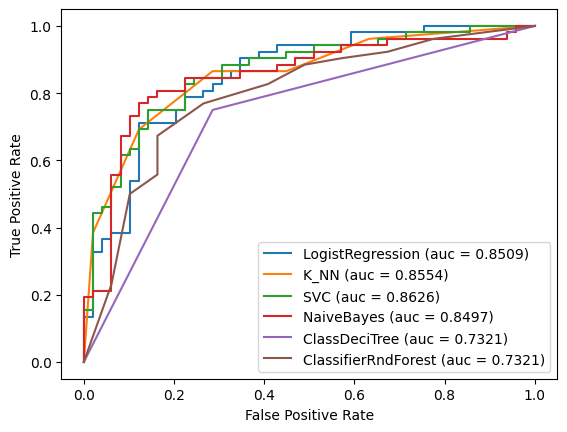

In [ ]:
from sklearn.metrics import roc_curve, auc
#fpr = false positive
#tpr = true positive
#threshold = limite

# 1-logisregression
y_prob_logisregression  = logisregression.predict_proba(X_test_scaled) #Return probability estimates
logisregression_fpr, logisregression_tpr, threshold = roc_curve(y_test, y_prob_logisregression[:, 1])
auc_logisregressions = auc(logisregression_fpr, logisregression_tpr)
plt.plot(logisregression_fpr, logisregression_tpr, linestyle='-', label='LogistRegression (auc = %0.4f)' % auc_logisregressions)

# 2-K_Nearest_Neighbors
y_prob_KNN  = classifierK_NN.predict_proba(X_test_scaled)
KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, y_prob_KNN[:, 1])
auc_KNN = auc(KNN_fpr, KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='K_NN (auc = %0.4f)' % auc_KNN)

# 3-Support Vector Classification
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)

# 4-NaiveBayes
y_prob_NaiveBayes  = classifierNaiveBayes.predict_proba(X_test_scaled)
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_prob_NaiveBayes[:, 1])
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr, linestyle='-', label='NaiveBayes (auc = %0.4f)' % auc_NaiveBayes)

# 5-Decision Tree for Classification
y_prob_classifierTree  = classifierTree.predict_proba(X_test_scaled)
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test, y_prob_classifierTree[:, 1])
auc_classifierTree = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTree)

# 6-Decision Random Forests for Classification
y_prob_classifierRndForest  = classifierRandomForest.predict_proba(X_test_scaled)
classifierRndForest_fpr, classifierRndForest_tpr, threshold = roc_curve(y_test, y_prob_classifierRndForest[:, 1])
auc_classifierRndForest = auc(classifierRndForest_fpr, classifierRndForest_tpr)
plt.plot(classifierRndForest_fpr, classifierRndForest_tpr, linestyle='-', label='ClassifierRndForest (auc = %0.4f)' % auc_classifierTree)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Con este gráfico, llegamos a la conclusión de que, el modelo que mejor ha funcionado en cuanto al ratio entre verdaderos y falsos positivos, es la  Máquina de soporte vectorial, seguido de cerca por los modelos K_Nearest_Neighbors, Regresión logística y Naive-Bayes. Nuestros peores modelos son los Árboles de decisión y Bosques aleatorios.

Además, el AUC de nuestros modelos ha variado entre 0.73  y 0.86, lo cual significa que hemos tenido una precisión a la hora de predecir resultados de entre un 73 y un 86%. Estos valores son bastante buenos en general, aunque teniendo en cuenta que nuestro dataset tiene como objetivo, predecir el riesgo de infarto en un paciente, cualquier incremento en la precisión del modelo, es bienvenido.

## Validación cruzada


### Validación cruzada con train

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_logisregression_train = cross_val_score(logisregression, X_train_scaled, y_train, scoring="accuracy", cv=10)
scores_classifierK_NN_train = cross_val_score(classifierK_NN, X_train_scaled, y_train, scoring="accuracy", cv=10)
scores_classifierSVC_train = cross_val_score(classifierSVC, X_train_scaled, y_train, scoring="accuracy", cv=10)
scores_classifierNaiveBayes_train = cross_val_score(classifierNaiveBayes, X_train_scaled, y_train, scoring="accuracy", cv=10)
scores_classifierTree_train = cross_val_score(classifierTree, X_train_scaled, y_train, scoring="accuracy", cv=10)
scores_classifierRandomForest_train = cross_val_score(classifierRandomForest, X_train_scaled, y_train, scoring="accuracy", cv=10)

In [ ]:
print("Linear Regression: Puntuación de rendimiento: ",scores_logisregression_train)
print("Linear Regression: Puntuación de rendimiento media: ",scores_logisregression_train.mean())
print("")
print("K-Nearest-Neighbors: Puntuación de rendimiento:",scores_classifierK_NN_train)
print("K-Nearest-Neighbors: Puntuación de rendimiento media: ",scores_classifierK_NN_train.mean())
print("")
print("SVC: Puntuación de rendimiento: ",scores_classifierSVC_train)
print("SVC:Puntuación de rendimiento media: ",scores_classifierSVC_train.mean())
print("")
print("Naive-Bayes: Puntuación de rendimiento ",scores_classifierNaiveBayes_train)
print("Naive-Bayes: Puntuación de rendimiento media: ",scores_classifierNaiveBayes_train.mean())
print("")
print("DecissionTree:Puntuación de rendimiento: ",scores_classifierTree_train)
print("DecissionTree: Puntuación de rendimiento media: ",scores_classifierTree_train.mean())
print("")
print("RandomForest: Puntuación de rendimiento: ",scores_classifierRandomForest_train)
print("RandomForest: Puntuación de rendimiento media: ",scores_classifierRandomForest_train.mean())

Linear Regression: Puntuación de rendimiento:  [0.86 0.57 0.79 0.71 0.77 0.92 0.85 0.77 0.77 0.77]
Linear Regression: Puntuación de rendimiento media:  0.7774725274725275

K-Nearest-Neighbors: Puntuación de rendimiento: [0.86 0.57 0.93 0.71 0.77 0.92 0.77 0.85 0.85 0.85]
K-Nearest-Neighbors: Puntuación de rendimiento media:  0.8071428571428572

SVC: Puntuación de rendimiento:  [0.86 0.57 0.93 0.71 0.77 0.85 0.92 0.92 0.85 0.85]
SVC:Puntuación de rendimiento media:  0.8225274725274725

Naive-Bayes: Puntuación de rendimiento  [0.79 0.71 0.71 0.86 0.62 0.77 0.85 0.77 0.85 0.69]
Naive-Bayes: Puntuación de rendimiento media:  0.760989010989011

DecissionTree:Puntuación de rendimiento:  [0.79 0.64 0.71 0.50 0.62 0.77 0.92 0.54 0.69 0.85]
DecissionTree: Puntuación de rendimiento media:  0.7027472527472527

RandomForest: Puntuación de rendimiento:  [0.86 0.50 0.86 0.64 0.77 0.85 0.85 0.77 0.85 0.92]
RandomForest: Puntuación de rendimiento media:  0.7857142857142857


Como podemos ver, la validación cruzada corrobora que el modelo que mejor resultados nos está proporcionando, es el SVC.

### Validación cruzada con test

In [ ]:
scores_logisregression_test = cross_val_score(logisregression, X_test_scaled, y_test, scoring="accuracy", cv=10)
scores_classifierK_NN_test = cross_val_score(classifierK_NN, X_test_scaled, y_test, scoring="accuracy", cv=10)
scores_classifierSVC_test = cross_val_score(classifierSVC, X_test_scaled, y_test, scoring="accuracy", cv=10)
scores_classifierNaiveBayes_test = cross_val_score(classifierNaiveBayes, X_test_scaled, y_test, scoring="accuracy", cv=10)
scores_classifierTree_test = cross_val_score(classifierTree, X_test_scaled, y_test, scoring="accuracy", cv=10)
scores_classifierRandomForest_test = cross_val_score(classifierRandomForest, X_test_scaled, y_test, scoring="accuracy", cv=10)

In [ ]:
print("Linear Regression: Puntuación de rendimiento: ",scores_logisregression_test)
print("Linear Regression: Puntuación de rendimiento media: ",scores_logisregression_test.mean())
print("")
print("K-Nearest-Neighbors: Puntuación de rendimiento:",scores_classifierK_NN_test)
print("K-Nearest-Neighbors: Puntuación de rendimiento media: ",scores_classifierK_NN_test.mean())
print("")
print("SVC: Puntuación de rendimiento: ",scores_classifierSVC_test)
print("SVC:Puntuación de rendimiento media: ",scores_classifierSVC_test.mean())
print("")
print("Naive-Bayes: Puntuación de rendimiento ",scores_classifierNaiveBayes_test)
print("Naive-Bayes: Puntuación de rendimiento media: ",scores_classifierNaiveBayes_test.mean())
print("")
print("DecissionTree:Puntuación de rendimiento: ",scores_classifierTree_test)
print("DecissionTree: Puntuación de rendimiento media: ",scores_classifierTree_test.mean())
print("")
print("RandomForest: Puntuación de rendimiento: ",scores_classifierRandomForest_test)
print("RandomForest: Puntuación de rendimiento media: ",scores_classifierRandomForest_test.mean())

Linear Regression: Puntuación de rendimiento:  [0.82 1.00 0.90 0.90 0.80 0.60 0.70 0.80 0.70 0.70]
Linear Regression: Puntuación de rendimiento media:  0.7918181818181818

K-Nearest-Neighbors: Puntuación de rendimiento: [0.82 0.90 0.90 0.60 0.80 0.60 0.70 0.80 0.70 0.80]
K-Nearest-Neighbors: Puntuación de rendimiento media:  0.7618181818181818

SVC: Puntuación de rendimiento:  [0.82 0.90 0.90 0.80 0.70 0.60 0.60 0.70 0.70 0.60]
SVC:Puntuación de rendimiento media:  0.7318181818181817

Naive-Bayes: Puntuación de rendimiento  [0.82 1.00 0.90 0.80 0.90 0.60 0.70 0.70 0.80 0.40]
Naive-Bayes: Puntuación de rendimiento media:  0.7618181818181818

DecissionTree:Puntuación de rendimiento:  [0.73 0.90 0.70 0.80 0.90 0.60 0.60 0.70 0.50 0.80]
DecissionTree: Puntuación de rendimiento media:  0.7227272727272728

RandomForest: Puntuación de rendimiento:  [0.64 0.90 0.90 0.80 0.70 0.40 0.60 0.70 0.70 0.90]
RandomForest: Puntuación de rendimiento media:  0.7236363636363637


# Prueba automática de multiples modelos e hiperparametros (GridSearch)


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# define model dictionary
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear',multi_class='auto', random_state = 0 ),
    'RandomForestClassifier': RandomForestClassifier(criterion = "entropy", random_state = 0 ),
    'SVM' : svm.SVC(gamma='auto', random_state = 0 ),
    'KNeighbor' : KNeighborsClassifier(metric = "minkowski", p = 2),
    'NaiveBayes' : GaussianNB(),
    'DecisionTree' : DecisionTreeClassifier(random_state = 0)
}
# define parameters dictionary
params = {
    'LogisticRegression': { 'C': [1, 5, 10] },
    'RandomForestClassifier': { 'n_estimators': [1, 5, 10] },
    'SVM' : { 'C': [1,10,20], 'kernel': ['rbf','linear'] } ,
    'KNeighbor' :  { 'n_neighbors': [1, 5, 10] },
    'NaiveBayes' : {'var_smoothing': np.logspace(0,-9, num=100)},
    'DecisionTree': {'criterion' : ['gini', 'entropy', 'log_loss']}

}

In [ ]:
models.keys()

dict_keys(['LogisticRegression', 'RandomForestClassifier', 'SVM', 'KNeighbor', 'NaiveBayes', 'DecisionTree'])

In [ ]:
models.values()

dict_values([LogisticRegression(random_state=0, solver='liblinear'), RandomForestClassifier(criterion='entropy', random_state=0), SVC(gamma='auto', random_state=0), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(random_state=0)])

In [ ]:
# then, retrieving the value for a given key:
models['LogisticRegression']

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for i in models.keys():
    clf =  GridSearchCV(models[i], params[i], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model': models[i],
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,"LogisticRegression(random_state=0, solver='lib...",0.761254,{'C': 1}
1,"RandomForestClassifier(criterion='entropy', ra...",0.813960,{'n_estimators': 5}
2,"SVC(gamma='auto', random_state=0)",0.791168,"{'C': 1, 'kernel': 'rbf'}"
3,KNeighborsClassifier(),0.828490,{'n_neighbors': 10}
4,GaussianNB(),0.836182,{'var_smoothing': 1.0}
5,DecisionTreeClassifier(random_state=0),0.746724,{'criterion': 'entropy'}


La conclusión que sacamos del uso del GridSearch, es que nuestro modelo con mayor precisión debería ser el de Naive-Bayes, si lo utilizamos con los parámetros que nos han especificado.

Cabe destacar que el método de GridSearch también tiene posibilidad de error,
debido tanto a su propio funcionamiento, como a la posible falta de parámetros dentro del diccionario que indicamos antes de ejecutarlo. Es por esto que deberíamos utilizar los resultados de este método para elegir nuestro modelo y sus hiperparámetros, en conjunto con métodos distintos, y no de forma única.
